In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as mdates, seaborn as sns
from collections import Counter
import datetime, folium
sns.set()

np.random.seed(19)

In [2]:
train = pd.read_csv("./Files/train.csv", dtype = {'id': 'str'})
train['date'] = train['date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:])))
train['label'] = (train['target'] > 0).astype(int)

In [3]:
latest_date = np.max(train['date'])
oldest_date = np.min(train['date'])
calendar = [oldest_date + datetime.timedelta(days = i) for i in range((latest_date - oldest_date).days + 1)]

In [4]:
colors = sns.color_palette(n_colors = 20)

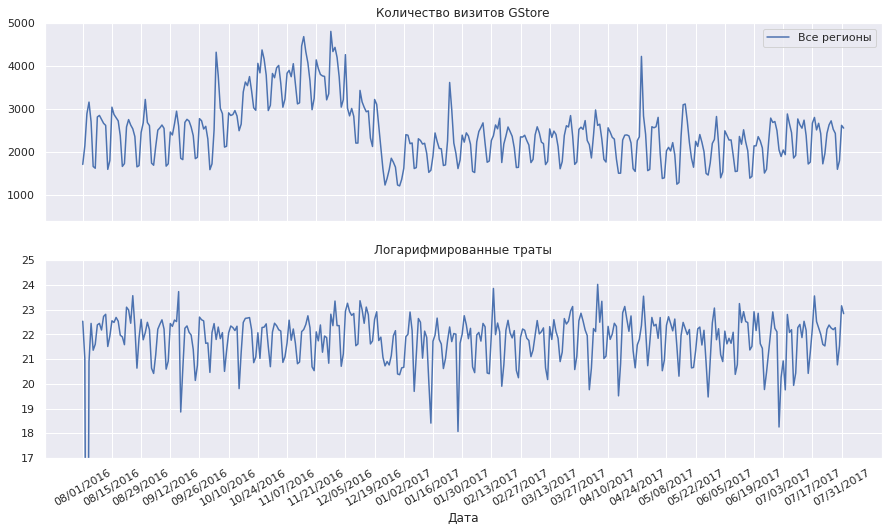

In [5]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
visits_by_day = Counter(train['date'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [visits_by_day[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Количество визитов GStore')
#plt.xlabel('Дата')
plt.legend(['Все регионы', 'USA'])
plt.ylim(400, 5000)


plt.subplot(2, 1, 2)
average_sums = train.groupby('date', sort = False)['target'].sum().apply(lambda x: np.log(1 + x))
#fig = plt.figure(figsize = (15, 4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, average_sums.loc[calendar, ])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Логарифмированные траты')
plt.xlabel('Дата')
#plt.ylim(3.8, 8)
plt.ylim((17., 25.))
#plt.legend(regions)
#plt.gcf().autofmt_xdate()
plt.show()

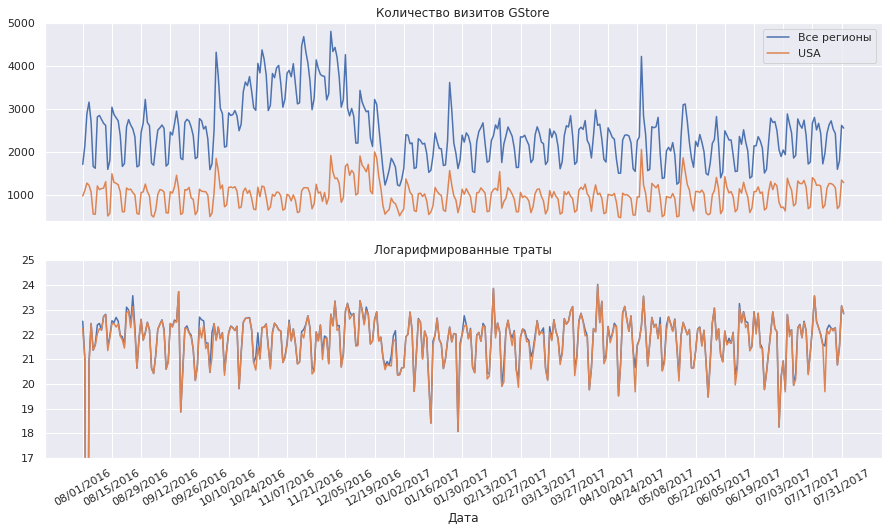

In [7]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
visits_by_day = Counter(train['date'])
cnt = Counter(train[train['geoNetwork_country'] == 'United States']['date'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, [visits_by_day[date] for date in calendar])
plt.plot(calendar, [cnt[date] for date in calendar])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Количество визитов GStore')
#plt.xlabel('Дата')
plt.legend(['Все регионы', 'USA'])
plt.ylim(400, 5000)


plt.subplot(2, 1, 2)
average_sums = train.groupby('date', sort = False)['target'].sum().apply(lambda x: np.log(1 + x))
average_sums_usa = train[train['geoNetwork_country'] == 'United States'].groupby('date', sort = False)['target'].sum().apply(lambda x: np.log(1 + x))
#fig = plt.figure(figsize = (15, 4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(calendar, average_sums.loc[calendar, ])
plt.plot(calendar, average_sums_usa.loc[calendar, ])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Логарифмированные траты')
plt.xlabel('Дата')
#plt.ylim(3.8, 8)
plt.ylim((17., 25.))
#plt.legend(regions)
#plt.gcf().autofmt_xdate()
plt.show()

In [9]:
values = train.groupby('id', sort = False).apply(lambda x: Counter(x['geoNetwork_country'].values).most_common()[0][0]).values
region_cnt = Counter(values)
regions = [el[0] for el in region_cnt.most_common()[:10]]

In [10]:
colors = sns.color_palette(n_colors = 20)

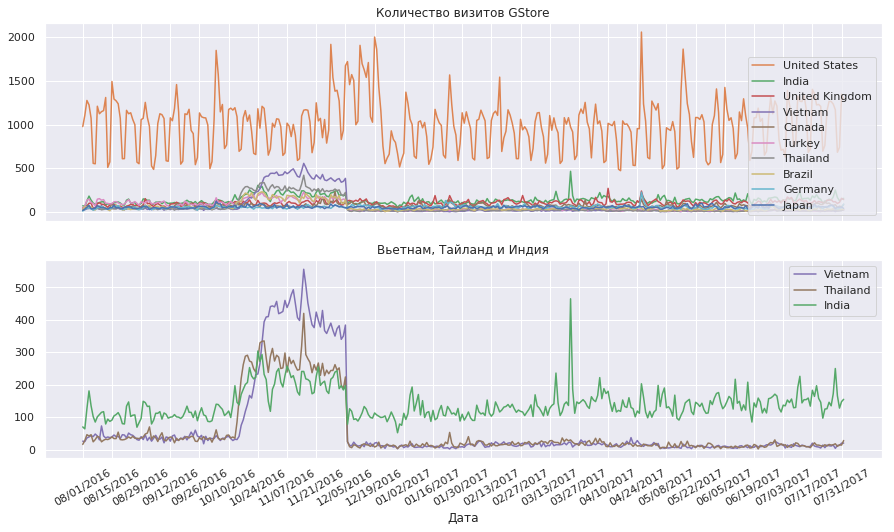

In [18]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 1, 1)
cnts = []
for region in regions:
    cnts.append(Counter(train[train['geoNetwork_country'] == region]['date']))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for k in range(len(cnts)):
    plt.plot(calendar, [cnts[k][date] for date in calendar], color = colors[k+1])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Количество визитов GStore')
plt.legend(regions, loc = 'lower right')#plt.gcf().autofmt_xdate()


plt.subplot(2, 1, 2)

countries = ['Vietnam', 'Thailand', 'India']
new_colors = [colors[4], colors[5], colors[2]]
cnts = []
for country in countries:
    cnts.append(Counter(train[train['geoNetwork_country'] == country]['date']))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.plot(calendar, [visits_by_day[date] for date in calendar])
for k in range(len(countries)):
    plt.plot(calendar, [cnts[k][date] for date in calendar], color = new_colors[k])
plt.xticks(calendar[::14], rotation = 30)
plt.title('Вьетнам, Тайланд и Индия')
plt.legend(countries)
plt.xlabel('Дата')
plt.show()

In [ ]:
pos_sample = sample[sample['target'] > 0]
neg_sample = sample[sample['target'] == 0]

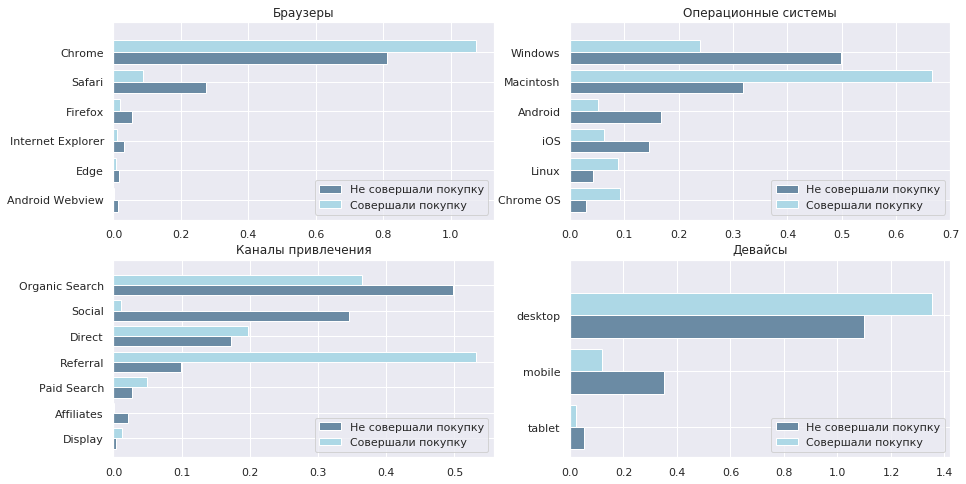

In [32]:
fig = plt.figure(figsize = (15, 8))

plt.subplot(2, 2, 1)

pos_samples = pos_sample.groupby('id', sort = False).apply(lambda x: Counter(x['device_browser']).most_common()[0][0])
neg_samples = neg_sample.groupby('id', sort = False).apply(lambda x: Counter(x['device_browser']).most_common()[0][0])
cats = [el[0] for el in Counter(list(pos_samples) + list(neg_samples)).most_common()]
cat2idx = dict((cats[::-1][i], i) for i in np.arange(len(cats)))

pos_cnt = Counter(pos_samples)
neg_cnt = Counter(neg_samples)

pos_samples = sum([[el] * pos_cnt[el] for el in cats[:6]], [])
neg_samples = sum([[el] * neg_cnt[el] for el in cats[:6]], [])

values = [[cat2idx[el] for el in data] for data in [neg_samples, pos_samples]]
n, bins, patches = plt.hist(x = values, bins = 6, orientation = 'horizontal', align = 'left', 
                            color = ['#6b8ba4', 'lightblue'], edgecolor = 'white', density = True)
plt.yticks(bins, cats[::-1][-6:])
plt.title('Браузеры')
plt.legend(['Не совершали покупку', 'Совершали покупку'], loc = 'lower right')
#plt.xlabel('Количество пользователей')

plt.subplot(2, 2, 2)

col = 'device_operatingSystem'
l = 6

pos_samples = pos_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
neg_samples = neg_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
cats = [el[0] for el in Counter(list(pos_samples) + list(neg_samples)).most_common()]
cat2idx = dict((cats[::-1][i], i) for i in np.arange(len(cats)))

pos_cnt = Counter(pos_samples)
neg_cnt = Counter(neg_samples)

pos_samples = sum([[el] * pos_cnt[el] for el in cats[:l]], [])
neg_samples = sum([[el] * neg_cnt[el] for el in cats[:l]], [])

values = [[cat2idx[el] for el in data] for data in [neg_samples, pos_samples]]
n, bins, patches = plt.hist(x = values, bins = l, orientation = 'horizontal', align = 'left', 
                            color = ['#6b8ba4', 'lightblue'], edgecolor = 'white', density = True)
plt.yticks(bins, cats[::-1][-l:])
plt.title('Операционные системы')
plt.legend(['Не совершали покупку', 'Совершали покупку'], loc = 'lower right')
#plt.xlabel('Количество пользователей')

plt.subplot(2, 2, 3)

col = 'channel'
l = 7

pos_samples = pos_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
neg_samples = neg_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
cats = [el[0] for el in Counter(list(pos_samples) + list(neg_samples)).most_common()]
cat2idx = dict((cats[::-1][i], i) for i in np.arange(len(cats)))

pos_cnt = Counter(pos_samples)
neg_cnt = Counter(neg_samples)

pos_samples = sum([[el] * pos_cnt[el] for el in cats[:l]], [])
neg_samples = sum([[el] * neg_cnt[el] for el in cats[:l]], [])

values = [[cat2idx[el] for el in data] for data in [neg_samples, pos_samples]]
n, bins, patches = plt.hist(x = values, bins = l, orientation = 'horizontal', align = 'left', 
                            color = ['#6b8ba4', 'lightblue'], edgecolor = 'white', density = True)
plt.yticks(bins, cats[::-1][-l:])
plt.title('Каналы привлечения')
plt.legend(['Не совершали покупку', 'Совершали покупку'], loc = 'lower right')
#plt.xlabel('Количество пользователей')

plt.subplot(2, 2, 4)

col = 'device_deviceCategory'
l = 3

pos_samples = pos_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
neg_samples = neg_sample.groupby('id', sort = False).apply(lambda x: Counter(x[col]).most_common()[0][0])
cats = [el[0] for el in Counter(list(pos_samples) + list(neg_samples)).most_common()]
cat2idx = dict((cats[::-1][i], i) for i in np.arange(len(cats)))

pos_cnt = Counter(pos_samples)
neg_cnt = Counter(neg_samples)

pos_samples = sum([[el] * pos_cnt[el] for el in cats[:l]], [])
neg_samples = sum([[el] * neg_cnt[el] for el in cats[:l]], [])

values = [[cat2idx[el] for el in data] for data in [neg_samples, pos_samples]]
n, bins, patches = plt.hist(x = values, bins = l, orientation = 'horizontal', align = 'left', 
                            color = ['#6b8ba4', 'lightblue'], edgecolor = 'white', density = True)
plt.yticks(bins, cats[::-1][-l:])
plt.title('Девайсы')
plt.legend(['Не совершали покупку', 'Совершали покупку'], loc = 'lower right')
#plt.xlabel('Количество пользователей')
plt.show()

In [140]:
map_path = '/home/ambitious/world_countries.json'

In [141]:
data = pd.DataFrame(train.groupby('geoNetwork_country', sort = False).size().sort_values()).reset_index()
data.rename({0: 'Count'}, axis = 1 ,inplace = True)
data['Count'] = np.log1p(data['Count'])

In [183]:
m = folium.Map(zoom_start = 0.1, tiles = 'Mapbox Bright', crs = 'EPSG3395')
m.choropleth(
    geo_data = map_path,
    name = 'choropleth',
    data = data,
    columns = ['geoNetwork_country', 'Count'],
    key_on = 'feature.properties.name',
fill_color='PuBu',
    fill_opacity=0.8,
    line_opacity=1.,
    legend_name='Активность на сайте GStore',
    line_weight = 0.8,
    highlight = False
)
folium.LayerControl().add_to(m)
m